In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df_wine = pd.read_csv('wine.csv')
df_wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df_wine.shape

(178, 14)

In [4]:
X = df_wine.drop(columns='Wine')
y = df_wine['Wine']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [6]:
cov_mat = np.cov(X_train_std.T)

In [7]:
cov_mat.shape

(13, 13)

In [8]:
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)

In [9]:
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

In [10]:
eigen_vecs

array([[-1.37242175e-01,  5.03034778e-01, -1.37748734e-01,
        -3.29610003e-03,  2.90625226e-01, -2.99096847e-01,
        -7.90529293e-02,  3.68176414e-01,  3.98377017e-01,
        -9.44869777e-02,  3.74638877e-01, -1.27834515e-01,
         2.62834263e-01],
       [ 2.47243265e-01,  1.64871190e-01,  9.61503863e-02,
         5.62646692e-01, -8.95378697e-02, -6.27036396e-01,
         2.74002014e-01,  1.25775752e-02, -1.10458230e-01,
         2.63652406e-02, -1.37405597e-01,  8.06401578e-02,
        -2.66769211e-01],
       [-2.54515927e-02,  2.44564761e-01,  6.77775667e-01,
        -1.08977111e-01,  1.60834991e-01, -3.89128239e-04,
        -1.32328045e-01, -1.77578177e-01, -3.82496856e-01,
         1.42747511e-01,  4.61583035e-01,  1.67924873e-02,
        -1.15542548e-01],
       [ 2.06945084e-01, -1.13529045e-01,  6.25040550e-01,
         3.38187002e-02, -5.15873402e-02,  4.05836452e-02,
        -2.23999097e-01,  4.40592110e-01,  2.43373853e-01,
        -1.30485780e-01, -4.18953989e

In [11]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

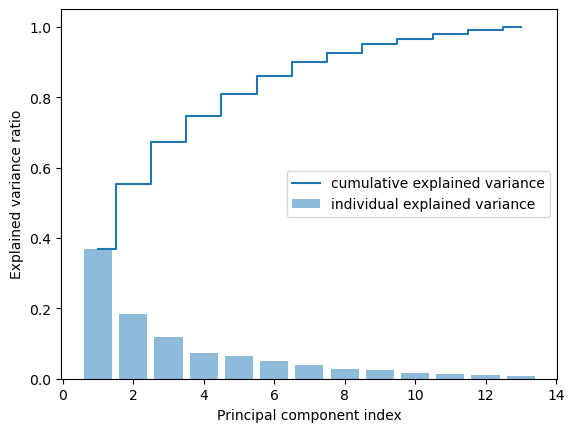

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [13]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [14]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
np.cumsum(pca.explained_variance_ratio_)

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

In [17]:
pca.components_

array([[-1.37242175e-01,  2.47243265e-01, -2.54515927e-02,
         2.06945084e-01, -1.54365821e-01, -3.93769523e-01,
        -4.17351064e-01,  3.05728961e-01, -3.06683469e-01,
         7.55406578e-02, -3.26132628e-01, -3.68610222e-01,
        -2.96696514e-01],
       [ 5.03034778e-01,  1.64871190e-01,  2.44564761e-01,
        -1.13529045e-01,  2.89745182e-01,  5.08010391e-02,
        -2.28733792e-02,  9.04888470e-02,  8.35232677e-03,
         5.49775805e-01, -2.07164328e-01, -2.49025357e-01,
         3.80229423e-01],
       [-1.37748734e-01,  9.61503863e-02,  6.77775667e-01,
         6.25040550e-01,  1.96135481e-01,  1.40310572e-01,
         1.17053859e-01,  1.31217777e-01,  3.04309008e-02,
        -7.99299713e-02,  5.30591506e-02,  1.32391030e-01,
        -7.06502178e-02],
       [-3.29610003e-03,  5.62646692e-01, -1.08977111e-01,
         3.38187002e-02, -3.67511070e-01,  2.40245127e-01,
         1.87053299e-01, -2.29262234e-02,  4.96262330e-01,
         1.06482939e-01, -3.69053747e

In [18]:
# LDA - Supervised ML Technique (Features & Target)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train_std,y_train)

In [19]:
lda.explained_variance_ratio_

array([0.66162655, 0.33837345])

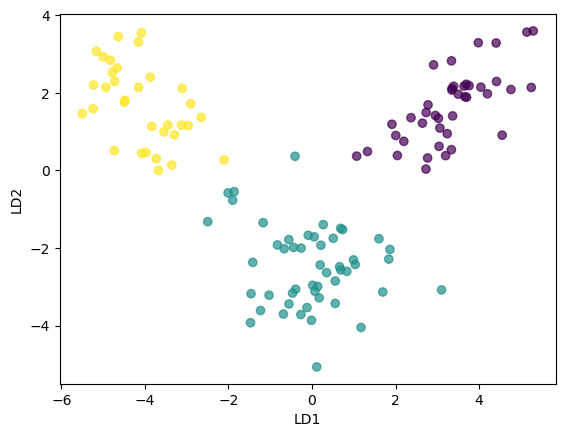

In [20]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    alpha=0.7,
)